MACHINE LEARNING TUTORIAL

IMPORTING NECESSARY LIBRARIES AND MODULES

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


GENERATING A SYNTHETIC DATASET USING MAKE_MOONS

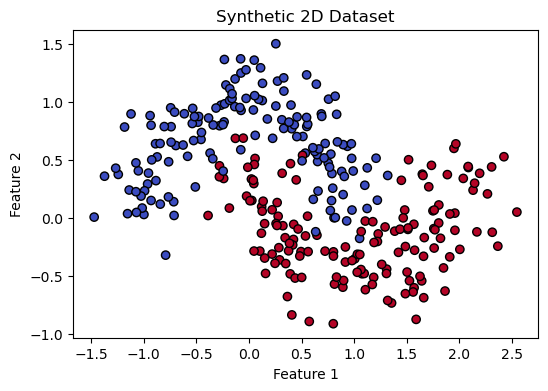

In [23]:
# Generate synthetic dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize dataset
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Synthetic 2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

TRAINING SVM MODELS WITH DIFFERENT KERNELS ON THIS DATASET

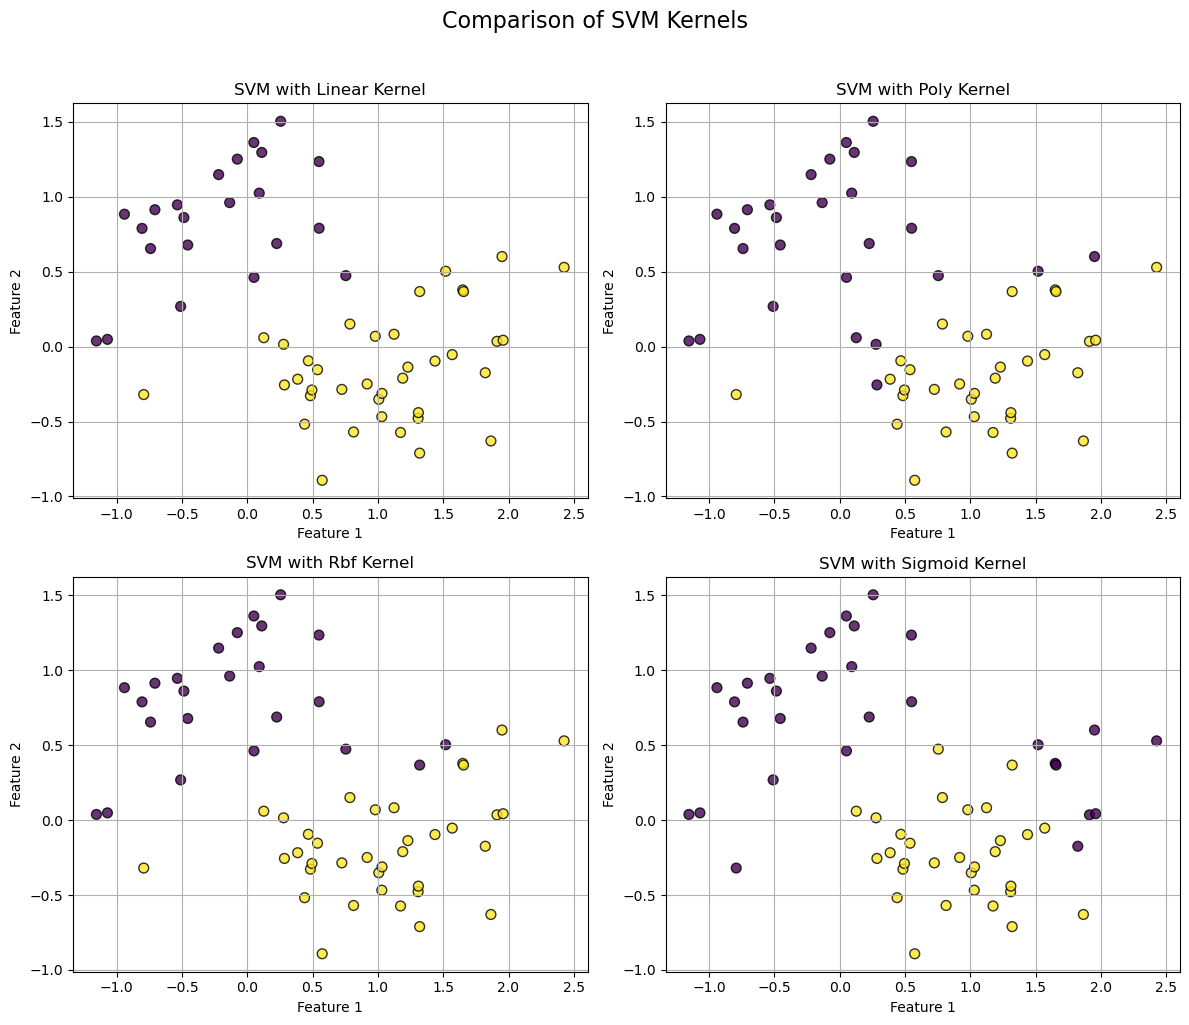

In [44]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Define kernels and initialize plot
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
plt.figure(figsize=(12, 10))

# Use a cleaner colormap and improve visual styling
cmap = plt.cm.viridis  # Professional color scheme

for i, kernel in enumerate(kernels):
    svc = SVC(kernel=kernel, gamma='auto').fit(X_train, y_train)
    predictions = svc.predict(X_test)
    
    plt.subplot(2, 2, i+1)
    scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=cmap, edgecolor='black', s=50, alpha=0.8)
    plt.title(f'SVM with {kernel.capitalize()} Kernel', fontsize=12)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)

plt.suptitle("Comparison of SVM Kernels", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


LOADING REAL WORLD BREAST CANCER DATASET

In [47]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Explore the dataset
print("Shape of X:", X.shape)
print("Classes:", data.target_names)
print("Class distribution:", np.bincount(y))


Shape of X: (569, 30)
Classes: ['malignant' 'benign']
Class distribution: [212 357]


In [49]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [12]:
# For classifier
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# For PCA visualization
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)


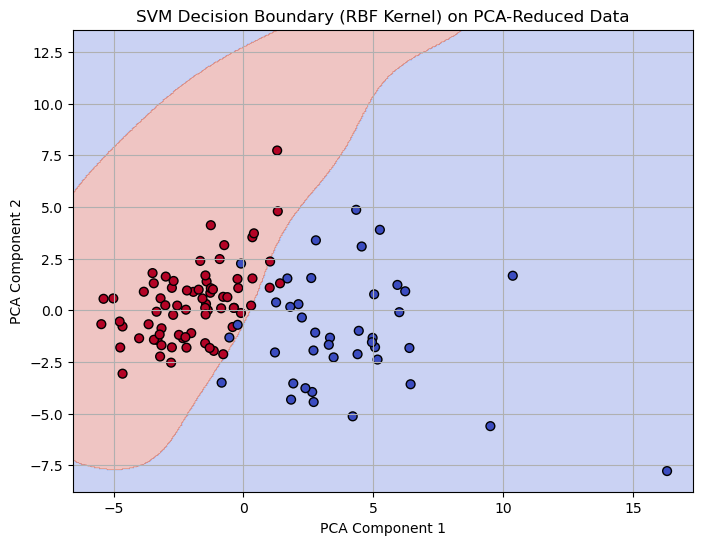

In [13]:
# Train SVM on PCA-reduced data
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_pca, y_train_pca)

# Create meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict regions
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, cmap='coolwarm', edgecolor='k', s=40)
plt.title("SVM Decision Boundary (RBF Kernel) on PCA-Reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [14]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



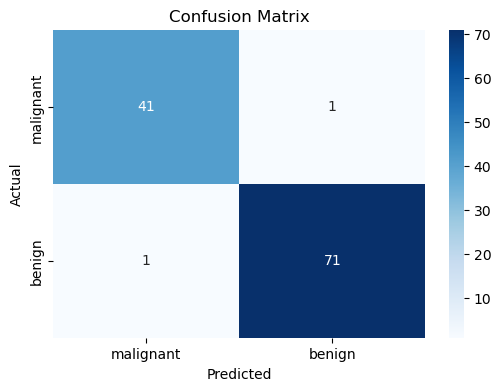

In [15]:
y_pred = grid.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


COMPARING DIFFERENT MODELS WITH SVM

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {
    'SVM': SVC(kernel='rbf'),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=data.target_names))


SVM Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Logistic Regression Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Decision Tree Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

   malignant       0.87      0.93      0.90        42
      benign       0.96      0.92      0.94        72

    accuracy                           0.92       114
   